<a href="https://colab.research.google.com/github/Rishthegod/blank/blob/master/Copy_of_Estimating_a_Risk_Factor_Model_for_a_Stock_with_Live_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader
import matplotlib.pyplot as plt

In [ ]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [ ]:
#start = "1926-01-01" # start date of importing data
start = input("Input a start date in the format YYYY-MM-DD")
setfreq = input("type in either M or D for monthly or Daily analysis")

Input a start date in the format YYYY-MM-DD2017-01-01
type in either M or D for monthly or Daily analysisM


In [ ]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq= setfreq,start=start).read() #import the 3 factor analysis. frequency we check these factors is monthly, daily is too noisy apparently

In [ ]:
ff


{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2017-01    1.94 -1.14 -2.76  0.04
 2017-02    3.57 -2.02 -1.68  0.04
 2017-03    0.17  1.14 -3.32  0.03
 2017-04    1.09  0.72 -2.10  0.05
 2017-05    1.06 -2.52 -3.78  0.06
 ...         ...   ...   ...   ...
 2022-12   -6.41 -0.68  1.32  0.33
 2023-01    6.65  5.02 -4.05  0.35
 2023-02   -2.58  1.21 -0.78  0.34
 2023-03    2.51 -5.59 -9.01  0.36
 2023-04    0.61 -3.34 -0.03  0.35
 
 [76 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.11 -10.34  2.15
 2020   23.66  13.18 -46.56  0.45
 2021   23.56  -3.89  25.53  0.04
 2022  -21.60  -6.82  25.81  1.43,
 'DESCR': 'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202304 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2023 Kenneth R. French\n\

In [ ]:
ff_df = ff[0] #factors dataframe, only want first index (the 1162 rows x 4 columns) not whatever the yearly thing is (96rows x 4 columns)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

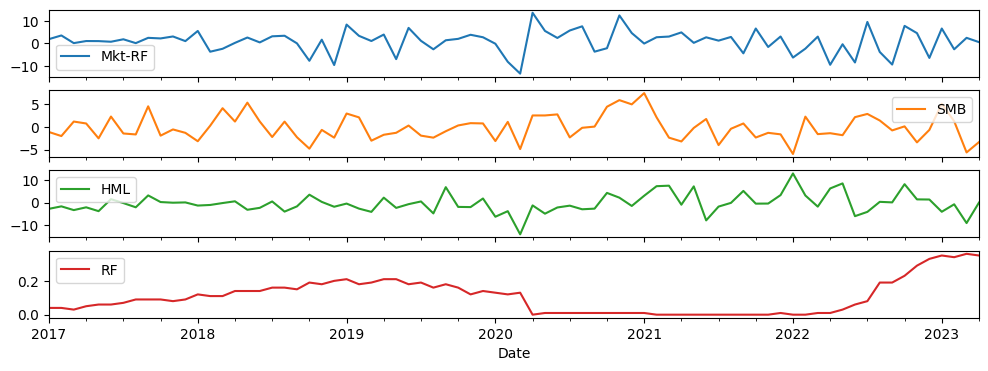

In [ ]:
ff_df.plot(subplots=True, figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

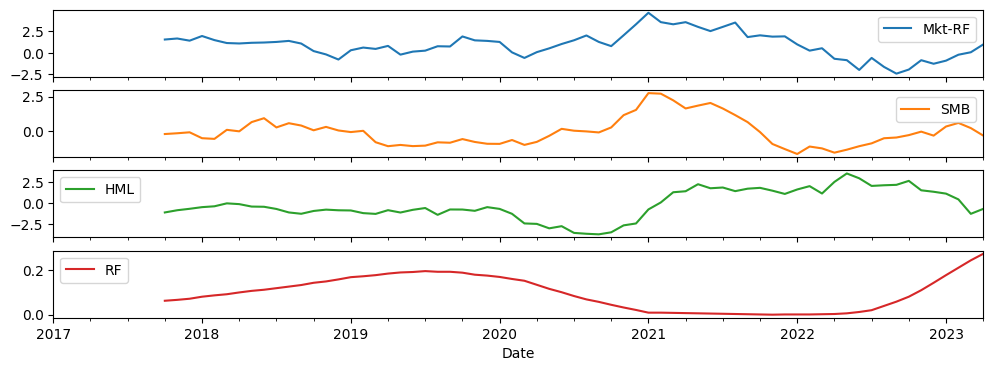

In [ ]:
ff_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [ ]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq=setfreq,start=start ).read()[0] #import momentum factors + already take first index like last time but now in the same command.

array([<Axes: xlabel='Date'>], dtype=object)

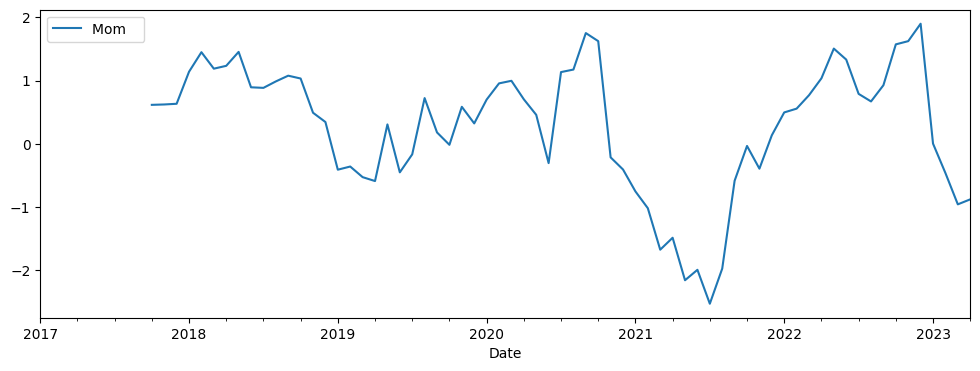

In [ ]:
ff_mom_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [ ]:
from traitlets.traitlets import validate
import pandas as pd #PD IS AN ALIAS for pandas library so you don't have to type out pandas each time

ffac_merged_df = pd.merge(ff_df,ff_mom_df,on ="Date", how = "inner", sort = True,copy=True,indicator=False, validate='one_to_one' ) #merge both datframes the 3 facctored one and the 1 factored momentum one validate one to one says that each date should only appear once. we do not want indicator that which value came from whcih dataset. inner merge (how) is we want to converge both sets.

In [ ]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2017-01,1.94,-1.14,-2.76,0.04,-0.93
2017-02,3.57,-2.02,-1.68,0.04,-1.65
2017-03,0.17,1.14,-3.32,0.03,-1.02
2017-04,1.09,0.72,-2.10,0.05,0.48
2017-05,1.06,-2.52,-3.78,0.06,1.48
...,...,...,...,...,...
2022-12,-6.41,-0.68,1.32,0.33,4.52
2023-01,6.65,5.02,-4.05,0.35,-15.98
2023-02,-2.58,1.21,-0.78,0.34,0.21


In [ ]:
!pip install yfinance  #pandasreader outdated so need to install yahoofinance to override outdated commands with new syntax to contact yahoo database

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

yf.pdr_override() #override pandas contact methods with yahoo's

SelectedStock = input("Please input a Ticker Symbol")

Please input a Ticker SymbolMA


In [ ]:
AAPL_data = pandas_datareader.data.get_data_yahoo(SelectedStock,start=start)['Adj Close'].resample(setfreq).ffill().pct_change() #run pandas command again but this time override with yfinance command

[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL_data

Date
2017-01-31         NaN
2017-02-28    0.038841
2017-03-31    0.018197
2017-04-30    0.036265
2017-05-31    0.056396
                ...   
2023-02-28   -0.041311
2023-03-31    0.022855
2023-04-30    0.047374
2023-05-31   -0.039497
2023-06-30    0.040518
Freq: M, Name: Adj Close, Length: 78, dtype: float64

In [ ]:
AAPL_df = AAPL_data.to_frame()

In [ ]:
AAPL_df


,Adj Close
Date,
2017-01-31,NaN
2017-02-28,0.038841
2017-03-31,0.018197
2017-04-30,0.036265
2017-05-31,0.056396
...,...
2023-02-28,-0.041311
2023-03-31,0.022855
2023-04-30,0.047374


array([<Axes: xlabel='Date'>], dtype=object)

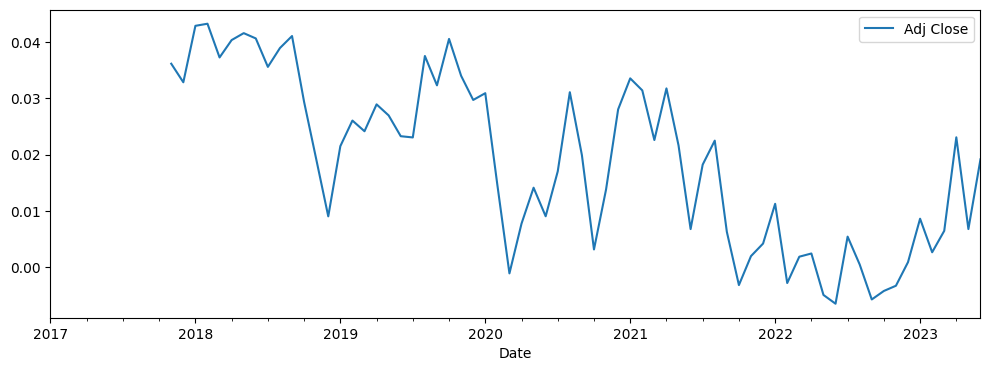

In [ ]:
AAPL_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [ ]:
AAPL_df.index.dtype #checking datatype for both dataframes before we merge factors and apple data, here we see it is saved as timestamps

dtype('<M8[ns]')

In [ ]:
ffac_merged_df.index.dtype #this is saved as a period

period[M]

In [ ]:
AAPL_df['str_date'] = AAPL_df.index.astype(str) #create new cloumn in dataframe of aaple where things are stored as strings which will later be converted into a common format for both dataframes
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m') #creates a new column in which pandas method is called to turn string into date


In [ ]:
AAPL_df #as seen dt_date column now has new data type with fromatting same as the factors dataframe, howver we still need to convert the datatype for the factors datframe too

,Adj Close,str_date,dt_date
Date,,,
2017-01-31,NaN,2017-01-31,2017-01
2017-02-28,0.038841,2017-02-28,2017-02
2017-03-31,0.018197,2017-03-31,2017-03
2017-04-30,0.036265,2017-04-30,2017-04
2017-05-31,0.056396,2017-05-31,2017-05
...,...,...,...
2023-02-28,-0.041311,2023-02-28,2023-02
2023-03-31,0.022855,2023-03-31,2023-03
2023-04-30,0.047374,2023-04-30,2023-04


In [ ]:
AAPL_df.dt_date.dtype #now saved as object

dtype('O')

In [ ]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [ ]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how = 'inner', on = 'dt_date', sort = True, copy = True, validate = "one_to_one") #we merge it baased on the shared cloumn in both"dt_date"

In [ ]:
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,2017-01-31,2017-01,1.94,-1.14,-2.76,0.04,-0.93,2017-01
1,0.038841,2017-02-28,2017-02,3.57,-2.02,-1.68,0.04,-1.65,2017-02
2,0.018197,2017-03-31,2017-03,0.17,1.14,-3.32,0.03,-1.02,2017-03
3,0.036265,2017-04-30,2017-04,1.09,0.72,-2.10,0.05,0.48,2017-04
4,0.056396,2017-05-31,2017-05,1.06,-2.52,-3.78,0.06,1.48,2017-05
...,...,...,...,...,...,...,...,...,...
71,-0.024327,2022-12-31,2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12
72,0.067499,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.98,2023-01
73,-0.041311,2023-02-28,2023-02,-2.58,1.21,-0.78,0.34,0.21,2023-02
74,0.022855,2023-03-31,2023-03,2.51,-5.59,-9.01,0.36,-2.50,2023-03


In [ ]:
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'],inplace = True) #dropping (removing) the two string date columns from merged database

In [ ]:
AAPL_ffac_merge_df.rename(columns={'Adj Close': 'AAPL'},inplace=True) #rename the adj close to apple

In [ ]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,2017-01,1.94,-1.14,-2.76,0.04,-0.93
1,0.038841,2017-02,3.57,-2.02,-1.68,0.04,-1.65
2,0.018197,2017-03,0.17,1.14,-3.32,0.03,-1.02
3,0.036265,2017-04,1.09,0.72,-2.10,0.05,0.48
4,0.056396,2017-05,1.06,-2.52,-3.78,0.06,1.48
...,...,...,...,...,...,...,...
71,-0.024327,2022-12,-6.41,-0.68,1.32,0.33,4.52
72,0.067499,2023-01,6.65,5.02,-4.05,0.35,-15.98
73,-0.041311,2023-02,-2.58,1.21,-0.78,0.34,0.21
74,0.022855,2023-03,2.51,-5.59,-9.01,0.36,-2.50


In [ ]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100 - AAPL_ffac_merge_df['RF'] #change AAPL coloumn decimal representaions of percent change per close to actual percent representaiton like in the market-RiskFree. Then we subract the Risk Free (RF cloumn) percent change from the AAPL percent change to get the excess returns when risk free returns are subracted

In [ ]:
AAPL_ffac_merge_df #now new AAPL_RF columsn shows apple returns net of the risk free rate

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,2017-01,1.94,-1.14,-2.76,0.04,-0.93,NaN
1,0.038841,2017-02,3.57,-2.02,-1.68,0.04,-1.65,3.844146
2,0.018197,2017-03,0.17,1.14,-3.32,0.03,-1.02,1.789657
3,0.036265,2017-04,1.09,0.72,-2.10,0.05,0.48,3.576523
4,0.056396,2017-05,1.06,-2.52,-3.78,0.06,1.48,5.579601
...,...,...,...,...,...,...,...,...
71,-0.024327,2022-12,-6.41,-0.68,1.32,0.33,4.52,-2.762652
72,0.067499,2023-01,6.65,5.02,-4.05,0.35,-15.98,6.399920
73,-0.041311,2023-02,-2.58,1.21,-0.78,0.34,0.21,-4.471144
74,0.022855,2023-03,2.51,-5.59,-9.01,0.36,-2.50,1.925462


In [ ]:
AAPL_ffac_merge_df.dropna(axis=0,inplace = True) #drop (remove) and rows int he table which have NaN or missing values such as the first one to avoid problems when running regression later on"

In [ ]:
list(AAPL_ffac_merge_df) #initially the momentum column randomly had three spaces behind it, now two workaround either reference it always as "Mom   " or rename it to "MOM" which is what we do here

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'AAPL_RF']

In [ ]:
AAPL_ffac_merge_df.rename(columns={'Mom   ' : 'MOM'},inplace=True)

In [ ]:
from statsmodels.api import OLS #Ordinary least squares regression line


results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']], missing='drop').fit() #independent variables are all the factors columns, dependent variables is AAPL_RF or the returns


In [ ]:
results.summary() #computer output missing y intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              23.29
Date:                Sat, 24 Jun 2023   Prob (F-statistic):                    2.54e-12
Time:                        06:16:36   Log-Likelihood:                         -226.66
No. Observations:                  75   AIC:                                      461.3
Df Residuals:                      71   BIC:                                      470.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.1439      0.129      8.844      0.000       0.886       1.402
SMB           -0.4664      0.230     -2.032      0.046      -0.924      -0.009
HML            0.0817      0.146      0.558      0.579      -0.210       0.374
MOM            0.0068      0.168      0.040      0.968      -0.329       0.342
==============================================================================
Omnibus:                        4.526   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.682
Skew:                          -0.472   Prob(JB):                        0.159
Kurtosis:                       3.536   Cond. No.                         2.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df,prepend=True) #add constant to a new dataframe

In [ ]:
AAPL_ffac_merge_df_c #new y intercept is shown here

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,0.038841,2017-02,3.57,-2.02,-1.68,0.04,-1.65,3.844146
2,1.0,0.018197,2017-03,0.17,1.14,-3.32,0.03,-1.02,1.789657
3,1.0,0.036265,2017-04,1.09,0.72,-2.10,0.05,0.48,3.576523
4,1.0,0.056396,2017-05,1.06,-2.52,-3.78,0.06,1.48,5.579601
5,1.0,-0.011637,2017-06,0.78,2.23,1.48,0.06,-0.09,-1.223727
...,...,...,...,...,...,...,...,...,...
71,1.0,-0.024327,2022-12,-6.41,-0.68,1.32,0.33,4.52,-2.762652
72,1.0,0.067499,2023-01,6.65,5.02,-4.05,0.35,-15.98,6.399920
73,1.0,-0.041311,2023-02,-2.58,1.21,-0.78,0.34,0.21,-4.471144
74,1.0,0.022855,2023-03,2.51,-5.59,-9.01,0.36,-2.50,1.925462


In [ ]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'],AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']], missing='drop').fit() #add y int as one of the independent vars

In [ ]:
print('Risk Factor Model for ' + SelectedStock)
print('Understanding your results: All factors are caclulated using the market data from start date-present \n Const coef: average percent under/overperformance of the selected ticker as compared to the market (the Alpha value)\n MKT-RF Coef: This is the Beta (risk exposure) value. A beta of 1.0 means the price of the stock is strongly correlated with the market. A beta value of 1.5 indicates that the price of the stock is 50% more volatile than the market. Tech stocks and small caps tend to have high betas.\n SMB coef: Small versus Big company: positive means the portfolio has more small companies and thus according to the model should outperform portfolios with larger companies in the long run \n HML coef: positive values means the stock/etf is tilted more towards value stocks, negative means that the stock/etf is tilted more towards growth stocks relative to the market \n MOM coef: tendency to move with the momentum of the market \n R squared value: how much of the variability in stock/equity price can be explained by these factors, expressed as a percentage in decimal form \n Note: P>|t| is the significance value for each coefficient General rule of thumb: signifance val should be <0.15 for the value to be statistically significant')
results.summary()#updated mathematically correct results


Risk Factor Model for MA
Understanding your results: All factors are caclulated using the market data from start date-present 
 Const coef: average percent under/overperformance of the selected ticker as compared to the market (the Alpha value)
 MKT-RF Coef: This is the Beta (risk exposure) value. A beta of 1.0 means the price of the stock is strongly correlated with the market. A beta value of 1.5 indicates that the price of the stock is 50% more volatile than the market. Tech stocks and small caps tend to have high betas.
 SMB coef: Small versus Big company: positive means the portfolio has more small companies and thus according to the model should outperform portfolios with larger companies in the long run 
 HML coef: positive values means the stock/etf is tilted more towards value stocks, negative means that the stock/etf is tilted more towards growth stocks relative to the market 
 MOM coef: tendency to move with the momentum of the market 
 R squared value: how much of the varia

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     21.46
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.38e-11
Time:                        07:11:12   Log-Likelihood:                -225.56
No. Observations:                  75   AIC:                             461.1
Df Residuals:                      70   BIC:                             472.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8695      0.603      1.442      0.154      -0.333       2.072
Mkt-RF         1.1017      0.132      8.370      0.000       0.839       1.364
SMB           -0.4428      0.228     -1.939      0.057      -0.898       0.013
HML            0.0925      0.146      0.635      0.527      -0.198       0.383
MOM           -0.0163      0.168     -0.097      0.923      -0.351       0.318
==============================================================================
Omnibus:                        4.495   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.669
Skew:                          -0.495   Prob(JB):                        0.160
Kurtosis:                       3.441   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

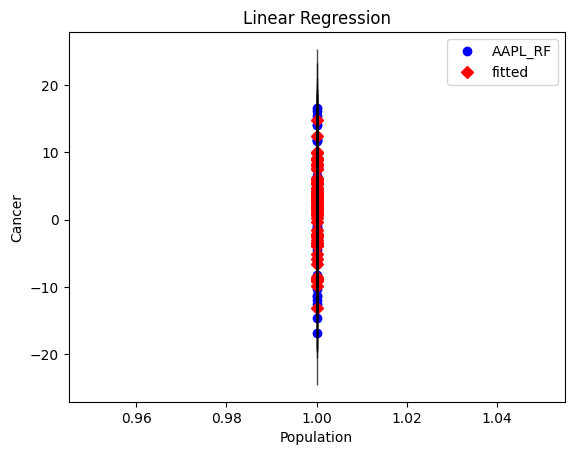

In [ ]:
import statsmodels.api as sm

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig = sm.graphics.plot_fit(results, 0, ax=ax)

ax.set_ylabel("Cancer")

ax.set_xlabel("Population")

ax.set_title("Linear Regression")